In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [115]:
# Read data from csv and print the head
data = pd.read_csv('UNdata_Export_20181124_222557311.csv')
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [78]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [79]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Afghanistan,2014,0.065098
1,Afghanistan,2013,0.060106
2,Afghanistan,2012,0.055568
3,Afghanistan,2011,0.050937
4,Afghanistan,2010,0.040750


In [80]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:16<00:00,  1.51s/it]


In [81]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.017846,0.070496,-0.587144,-0.513169,0.919234,0.040750,1.0,0.024348,0.0,NaN,...,0.000027,0.000051,0.000067,0.0,0.0,0.0,0.0,0.0,0.000527,0.0
Albania,1.756639,0.608947,-0.553129,-0.762668,0.820387,0.458435,1.0,0.153830,0.0,NaN,...,0.023510,0.046566,0.067732,0.0,0.0,0.0,0.0,0.0,0.054615,0.0
Algeria,0.168184,0.177709,-0.644761,-0.473405,1.142363,0.127343,1.0,0.056948,0.0,NaN,...,0.000606,0.001139,0.001616,0.0,0.0,0.0,0.0,0.0,0.003138,0.0
Andorra,6.181426,0.879172,-0.588723,-0.495535,0.910084,0.825183,1.0,0.151793,0.0,NaN,...,0.108921,0.217205,0.347705,0.0,0.0,0.0,0.0,0.0,0.086423,0.0
Angola,0.155135,0.215200,-0.538600,-0.569763,0.750344,0.101874,1.0,0.114711,0.0,NaN,...,0.000959,0.001621,0.001722,0.0,0.0,0.0,0.0,0.0,0.005768,0.0


In [42]:
#Check shape of new data with extracted features
extracted_features.shape

(210, 794)

In [83]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

552

In [ ]:
# it seems 552 columns out of 794 have some null values

In [56]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

In [84]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [85]:
#we dont have any nan values 

In [60]:
#Creating new Csv
data_after_impute.to_csv('new.csv')

In [87]:
# read from new csv file 
df = pd.read_csv('new.csv')
df.head()

,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
0,Afghanistan,0.017846,0.070496,-0.587144,-0.513169,0.919234,0.040750,1.0,0.024348,0.0,...,0.000027,0.000051,0.000067,0.0,0.0,0.0,0.0,0.0,0.000527,0.0
1,Albania,1.756639,0.608947,-0.553129,-0.762668,0.820387,0.458435,1.0,0.153830,0.0,...,0.023510,0.046566,0.067732,0.0,0.0,0.0,0.0,0.0,0.054615,0.0
2,Algeria,0.168184,0.177709,-0.644761,-0.473405,1.142363,0.127343,1.0,0.056948,0.0,...,0.000606,0.001139,0.001616,0.0,0.0,0.0,0.0,0.0,0.003138,0.0
3,Andorra,6.181426,0.879172,-0.588723,-0.495535,0.910084,0.825183,1.0,0.151793,0.0,...,0.108921,0.217205,0.347705,0.0,0.0,0.0,0.0,0.0,0.086423,0.0
4,Angola,0.155135,0.215200,-0.538600,-0.569763,0.750344,0.101874,1.0,0.114711,0.0,...,0.000959,0.001621,0.001722,0.0,0.0,0.0,0.0,0.0,0.005768,0.0


In [99]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

df['label'] = -1

for i,da in df.iterrows():
    if da['id'] in list_developed_countries:
        val = 1
        df.at[i,'label'] = val
    elif da['id'] in list_developing_countries:
        val = 0
        df.at[i,'label'] = val

In [101]:
# check new df with added column as label 
df.head()

,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Afghanistan,0.017846,0.070496,-0.587144,-0.513169,0.919234,0.040750,1.0,0.024348,0.0,...,0.000051,0.000067,0.0,0.0,0.0,0.0,0.0,0.000527,0.0,-1
1,Albania,1.756639,0.608947,-0.553129,-0.762668,0.820387,0.458435,1.0,0.153830,0.0,...,0.046566,0.067732,0.0,0.0,0.0,0.0,0.0,0.054615,0.0,-1
2,Algeria,0.168184,0.177709,-0.644761,-0.473405,1.142363,0.127343,1.0,0.056948,0.0,...,0.001139,0.001616,0.0,0.0,0.0,0.0,0.0,0.003138,0.0,0
3,Andorra,6.181426,0.879172,-0.588723,-0.495535,0.910084,0.825183,1.0,0.151793,0.0,...,0.217205,0.347705,0.0,0.0,0.0,0.0,0.0,0.086423,0.0,-1
4,Angola,0.155135,0.215200,-0.538600,-0.569763,0.750344,0.101874,1.0,0.114711,0.0,...,0.001621,0.001722,0.0,0.0,0.0,0.0,0.0,0.005768,0.0,0


In [103]:
#Split data into X(features),y 
y = df['label']
X = df.drop(columns=['id','label'])

In [128]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [129]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

         -1       0.39      0.35      0.37        34
          0       0.50      0.58      0.54        38
          1       0.56      0.42      0.48        12

avg / total       0.46      0.46      0.46        84

Accuracy is:  0.4642857142857143


[0.4880952380952381, 0.4523809523809524, 0.4880952380952381, 0.44047619047619047, 0.5833333333333334, 0.5476190476190477, 0.5476190476190477, 0.5119047619047619, 0.5238095238095238, 0.4642857142857143, 0.5119047619047619, 0.5, 0.5, 0.47619047619047616, 0.4642857142857143]


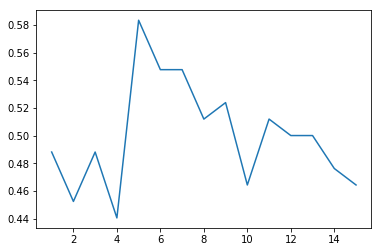

In [130]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

In [131]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.4901229722658295
Accuracy Score:  0.5119047619047619


[0.5244636316064887, 0.4901229722658295, 0.5076276487606537, 0.5586167800453514, 0.5581624791673218, 0.5385229849515564, 0.5233813805242377, 0.49872032729175586, 0.5256770604596691, 0.49175749052697376, 0.49175749052697376, 0.5283086478738652]


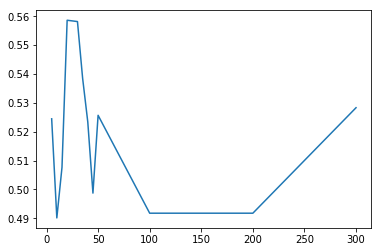

In [132]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [133]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.48757408710610683
Accuracy Score:  0.5


In [134]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.5876744373638784
Accuracy Score:  0.6071428571428571


[0.5283254840397698, 0.5812237985612598, 0.5555555555555556, 0.5877328541479484, 0.5471318758111211, 0.5403956751782838, 0.5516754850088184, 0.5293167701863354, 0.5198691784406071, 0.5134437543133196, 0.5140809011776755, 0.5462515920736944]


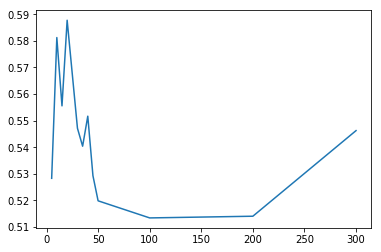

In [135]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = ExtraTreesClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)